In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [ ]:
data = pd.read_csv('data_for_lr.csv')

In [ ]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [ ]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


In [ ]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

In [ ]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [ ]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives


In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

In [ ]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

Iteration = 1, Loss = 5490.443271338575


<Figure size 640x480 with 0 Axes>

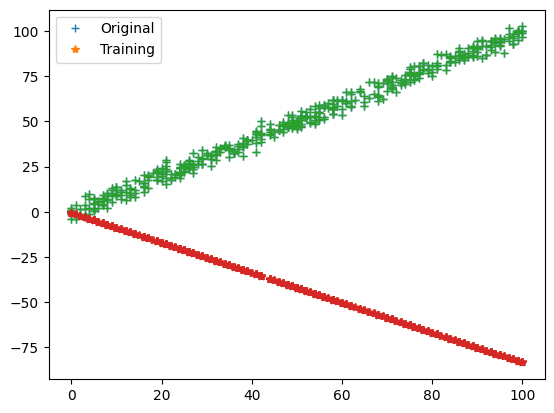

Iteration = 2, Loss = 2493.164532478774


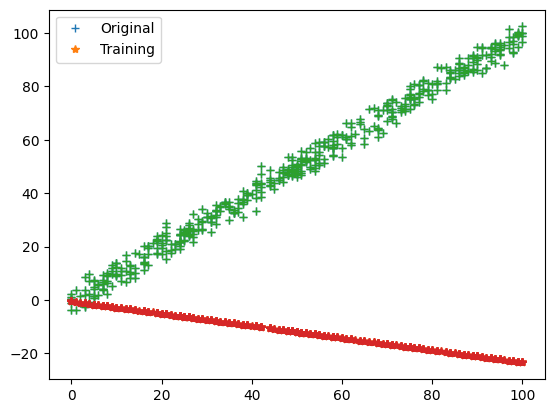

Iteration = 3, Loss = 1133.2958483399264


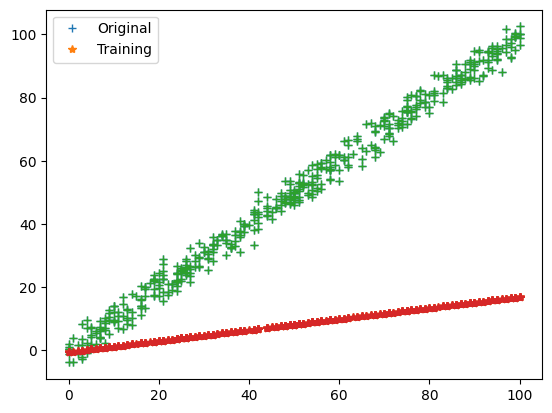

Iteration = 4, Loss = 516.3219196908562


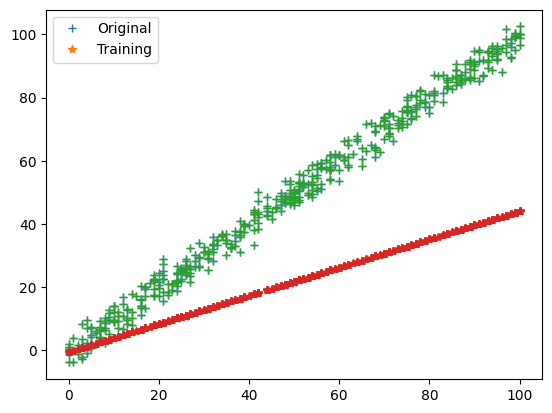

Iteration = 5, Loss = 236.40016446836782


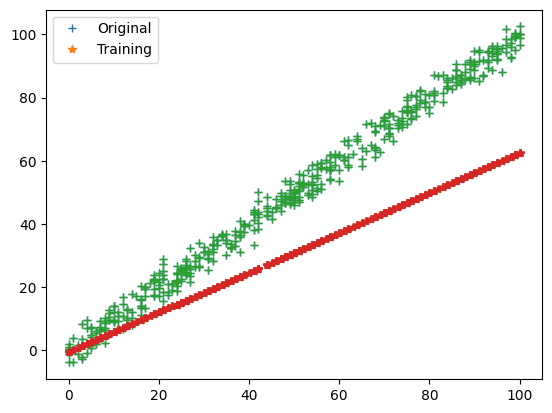

Iteration = 6, Loss = 109.39935366241849


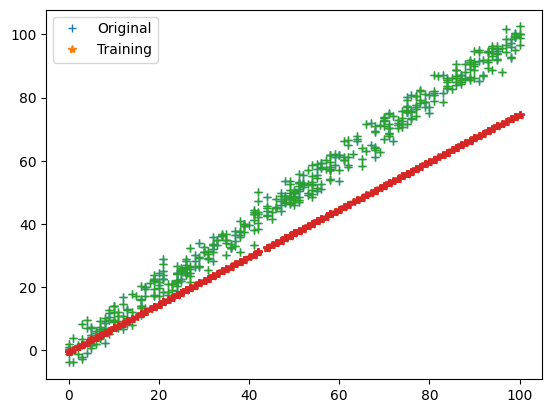

Iteration = 7, Loss = 51.77894471981415


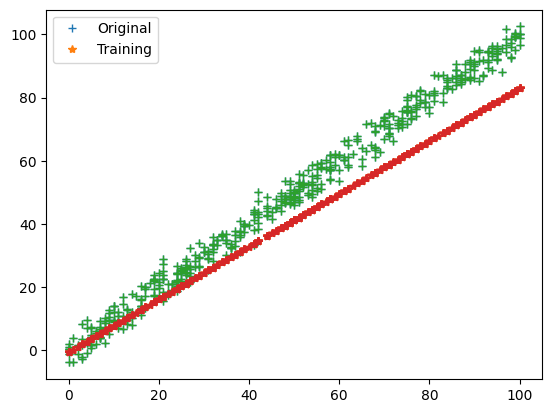

Iteration = 8, Loss = 25.63650095122263


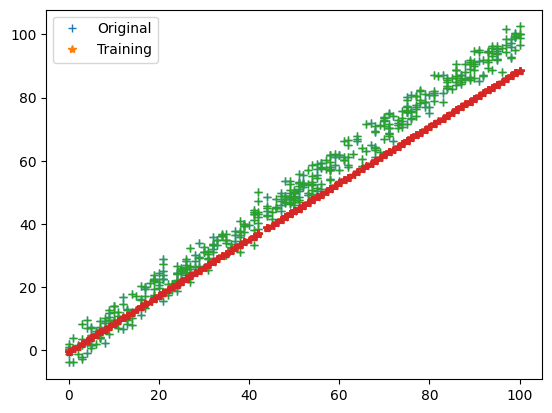

Iteration = 9, Loss = 13.775644848392785


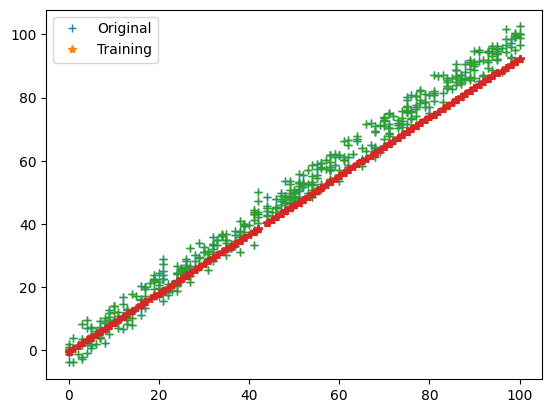

Iteration = 10, Loss = 8.394360888414738


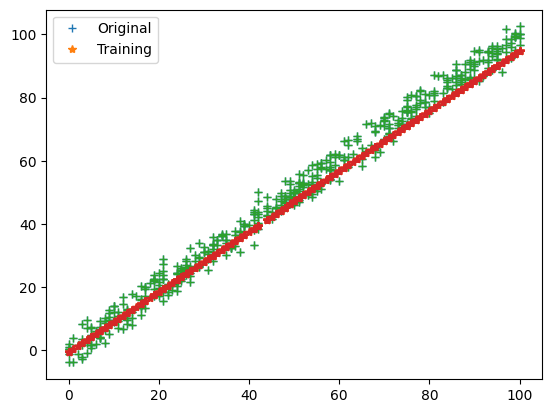

Iteration = 11, Loss = 5.952865986710249


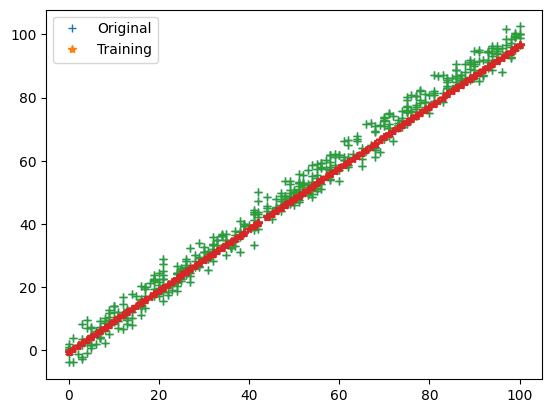

Iteration = 12, Loss = 4.845156636996599


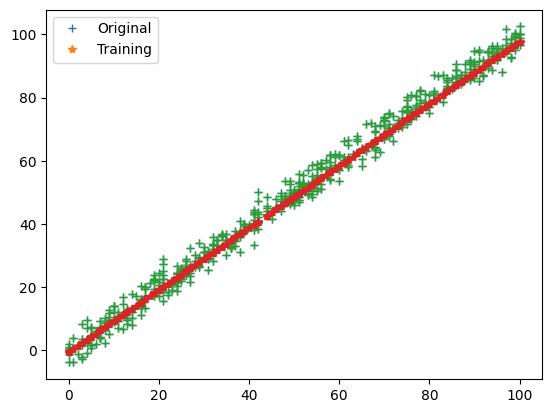

Iteration = 13, Loss = 4.342587269597603


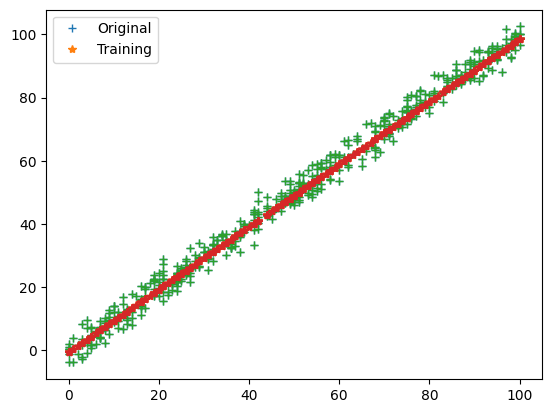

Iteration = 14, Loss = 4.114570582473343


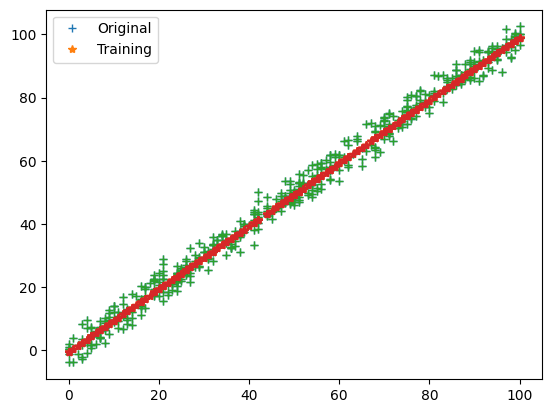

Iteration = 15, Loss = 4.011118750516161


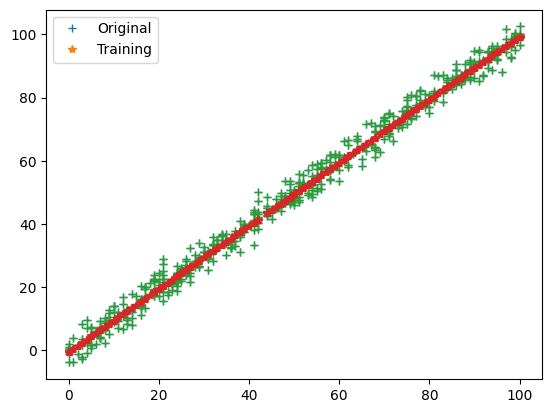

Iteration = 16, Loss = 3.9641821313420307


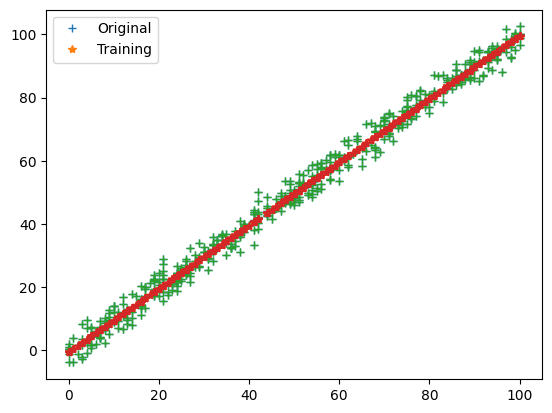

Iteration = 17, Loss = 3.9428865268267193


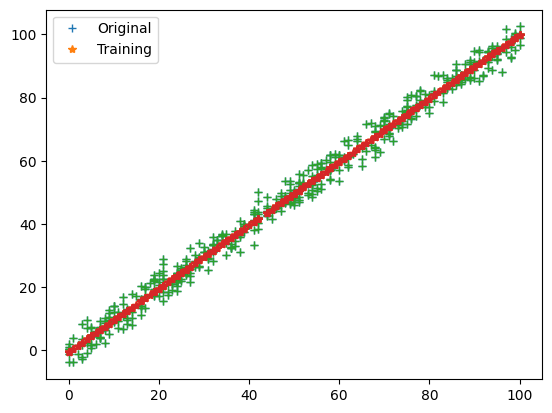

Iteration = 18, Loss = 3.93322427908373


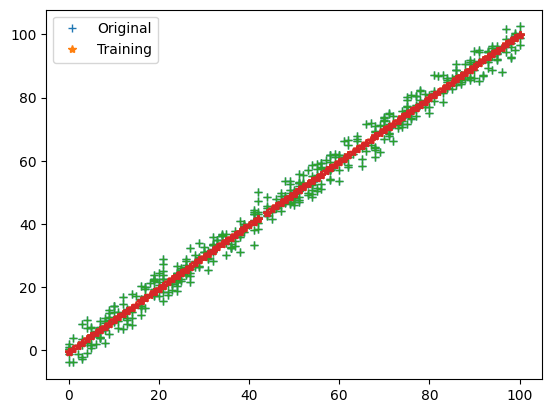

Iteration = 19, Loss = 3.9288400982145033


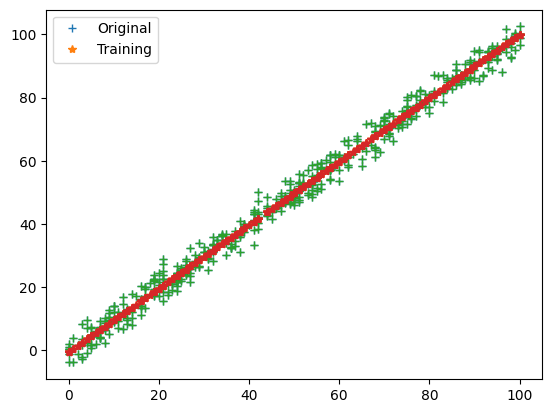

Iteration = 20, Loss = 3.926850582152678


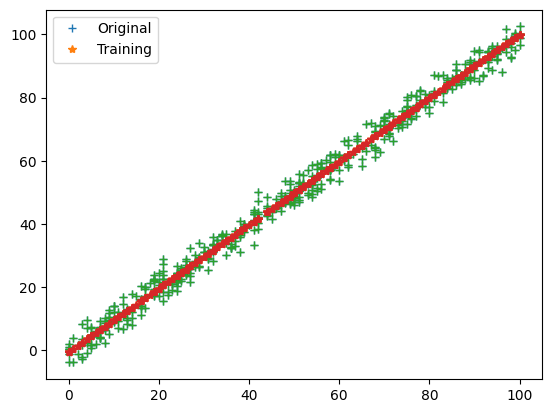

In [ ]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [ ]:
print(parameters)

{'m': np.float64(1.005518452021616), 'c': np.float64(-0.5792571410374155)}


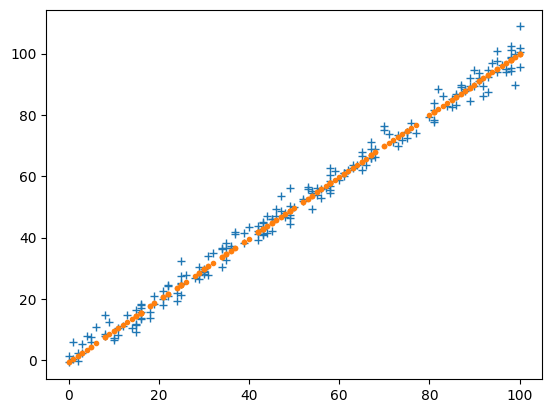

In [ ]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [ ]:
cost_function(test_predictions, test_output)

np.float64(4.0805108942676025)

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_input, train_output)

LinearRegression()

In [ ]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[[1.0009993]]
[-0.23603461]


In [ ]:
predicted_value = linear_regressor.predict(test_input)

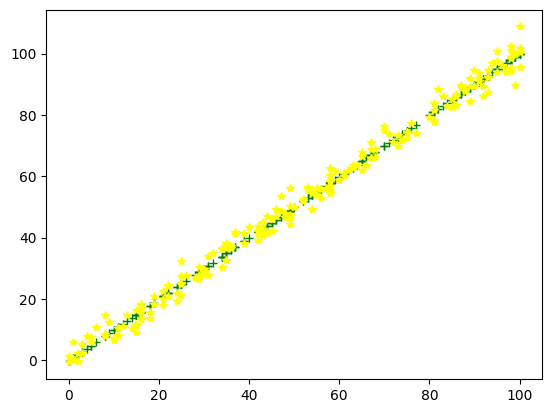

In [ ]:
plt.plot(test_input,predicted_value,'+',color="green")
plt.plot(test_input,test_output,'*',color="yellow")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(test_output, predicted_value)
print(cost)

8.030031591835378
